In [10]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft

In [11]:
def Spectrum1(x, Fs):
    '''
    One-sided amplitude spectrum of x(t).
    '''
    N = len(x) # length of the signal
    frq = (float(Fs)/N)*np.arange(0, N/2+1) # one-sided frequency range
    X = fft(x)/N # fft computing and normalization
    X = X[0:N//2+1] # take just positive values
    # (in python3, // ensures integer division)

    # frq is array of actual frequencies
    # X is complex array of amplitudes
    return frq , X

# Exercises

Mark weighting is in brackets. **Save your work to GitHub after having run all cells with `Runtime` -> `Restart and run all`. And do not change the notebook's filename.** Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

Read section Implementation above and do the following exercises.

## Exercise 0

See LearningCentral for an example video of a simple Fourier analysis.

## Exercise 1
[2] Plot the original signal $x$ against time instead of point number. (Use N=64 points.)

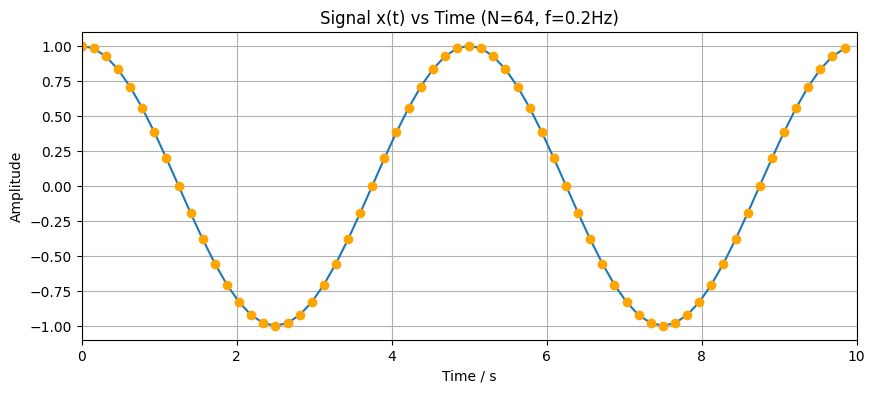

In [12]:
N = 64     # number of points
tau = 10.0 # time duration
f = 0.2    # frequency in Hz

# create time array and signal
t = np.linspace(0, tau, N, endpoint=False)
x = np.cos(2*np.pi*f*t)

# show graph
plt.figure(figsize=(10,4))
plt.plot(t, x, 'o-', mec='orange', mfc='orange') # show as points and line
plt.title(f'Signal x(t) vs Time (N={N}, f={f}Hz)')
plt.xlabel('Time / s')
plt.ylabel('Amplitude')
plt.xlim(0, tau)
plt.grid()
plt.show()


## Exercise 2
[2] Plot just the positive frequencies of the FFT using the `fft` routine of `numpy`. This is a plot versus point number.

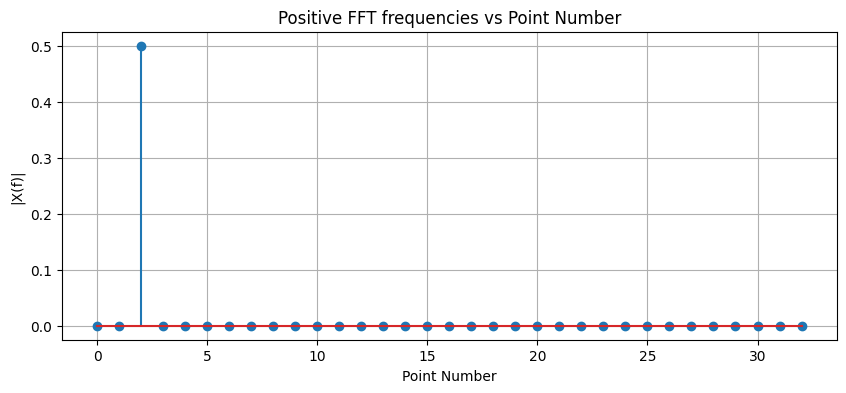

In [13]:
# calculate fft and normalise by N
X_raw = fft(x)/N
# select only positive X values
pos_X = np.abs(X_raw[0:N//2+1])

# show graph
plt.figure(figsize=(10,4))
plt.stem(pos_X) # stem gives the right looking graph
plt.title('Positive FFT frequencies vs Point Number')
plt.xlabel('Point Number')
plt.ylabel('|X(f)|')
plt.grid()
plt.show()

## Exercise 3

[2] For this question **and all the following**, use the `Spectrum1` function. Calculate and plot the FFT of $x$ versus frequency. (**In the rest of the exercises just plot against frequency.**) Why is the signal amplitude you find equal to 0.5 instead of 1?

 Recall: The sampling rate is $F_s = 1/\Delta t = N/\tau$. Read the section Summary above!



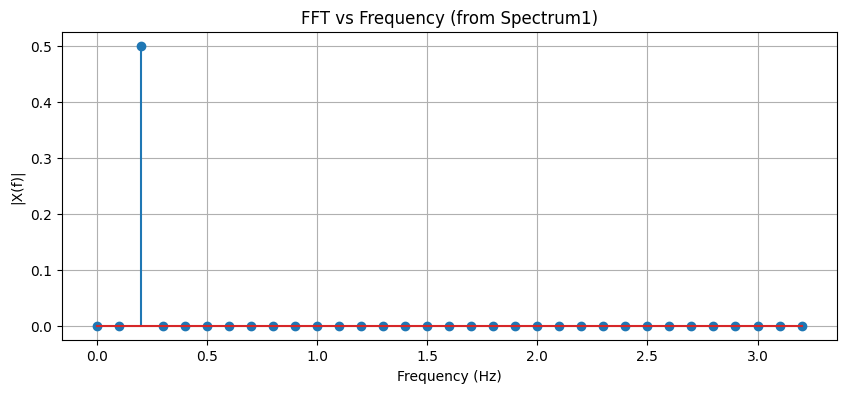


Peak amplitude is 0.5
It is 0.5 instead of 1, because energy is split between positive and negative frequencies.


In [14]:
# calculate sampling rate, Fs
Fs = N / tau
frq, X_spec = Spectrum1(x, Fs)

# plot fft of x against f
plt.figure(figsize=(10,4))
plt.stem(frq, np.abs(X_spec))
plt.title('FFT vs Frequency (from Spectrum1)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|X(f)|')
plt.grid()
plt.show()

print(f'\nPeak amplitude is {np.max(np.abs(X_spec))}\nIt is 0.5 instead of 1, because energy is split between positive and negative frequencies.')

## Exercise 4
[2] Show what happens if you change the frequency of the original data to 0.22 Hz instead of 0.2 Hz. _Explain what you see to the demonstrator_.
(Hint: It helps to plot both the real and imaginary parts of $X$, and to plot $\mid X \mid$.)



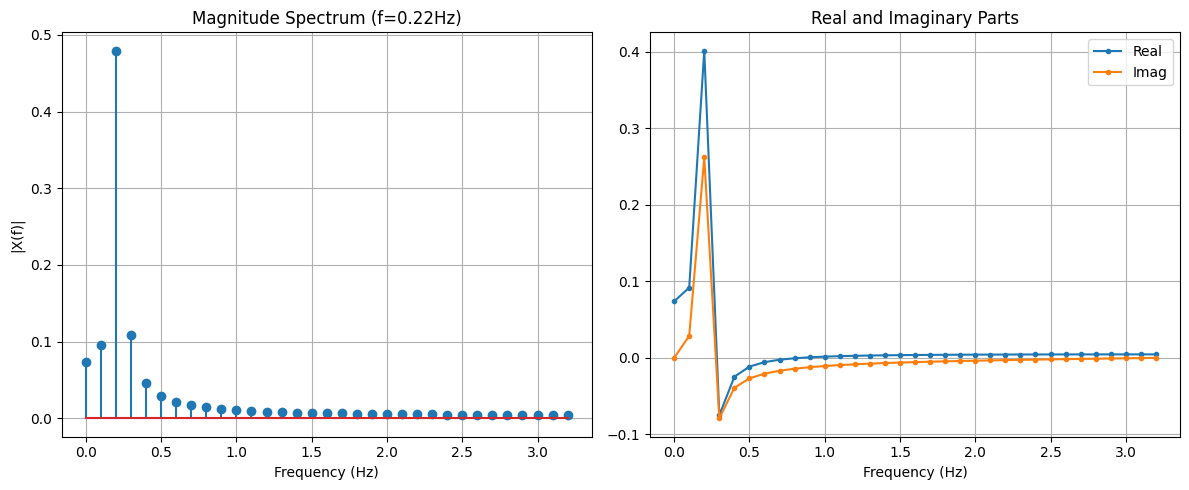


Because the frequencies that X(f) can be in are discrete, in 0.1 (1/tau) intervals, the f value of 0.22Hz causes an energy leakage into the adjacent frequencies.


In [15]:
f_new = 0.22
x_new = np.cos(2*np.pi*f_new*t) # re-calculate signal with new freq

frq_new, X_new = Spectrum1(x_new, Fs)

fig, ax = plt.subplots(1, 2, figsize=(12,5))

# plot magnitude
ax[0].stem(frq_new, np.abs(X_new)) # ∣X∣
ax[0].set_title(f'Magnitude Spectrum (f={f_new}Hz)')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('|X(f)|')
ax[0].grid()

# plot real and imaginary parts
ax[1].plot(frq_new, np.real(X_new), '.-', label='Real') # real part of X
ax[1].plot(frq_new, np.imag(X_new), '.-', label='Imag') # imaginary part of X
ax[1].set_title('Real and Imaginary Parts')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].legend()
ax[1].grid()

fig.tight_layout()
plt.show()

print('\nBecause the frequencies that X(f) can be in are discrete, in 0.1 (1/tau) intervals, the f value of 0.22Hz causes an energy leakage into the adjacent frequencies.')

## Exercise 5

[4] (a) Investigate what happens as you sample the original data with more points,  and (b) what happens as you increase the lenght $\tau$ of the original data (for both 0.2 and 0.22 Hz).



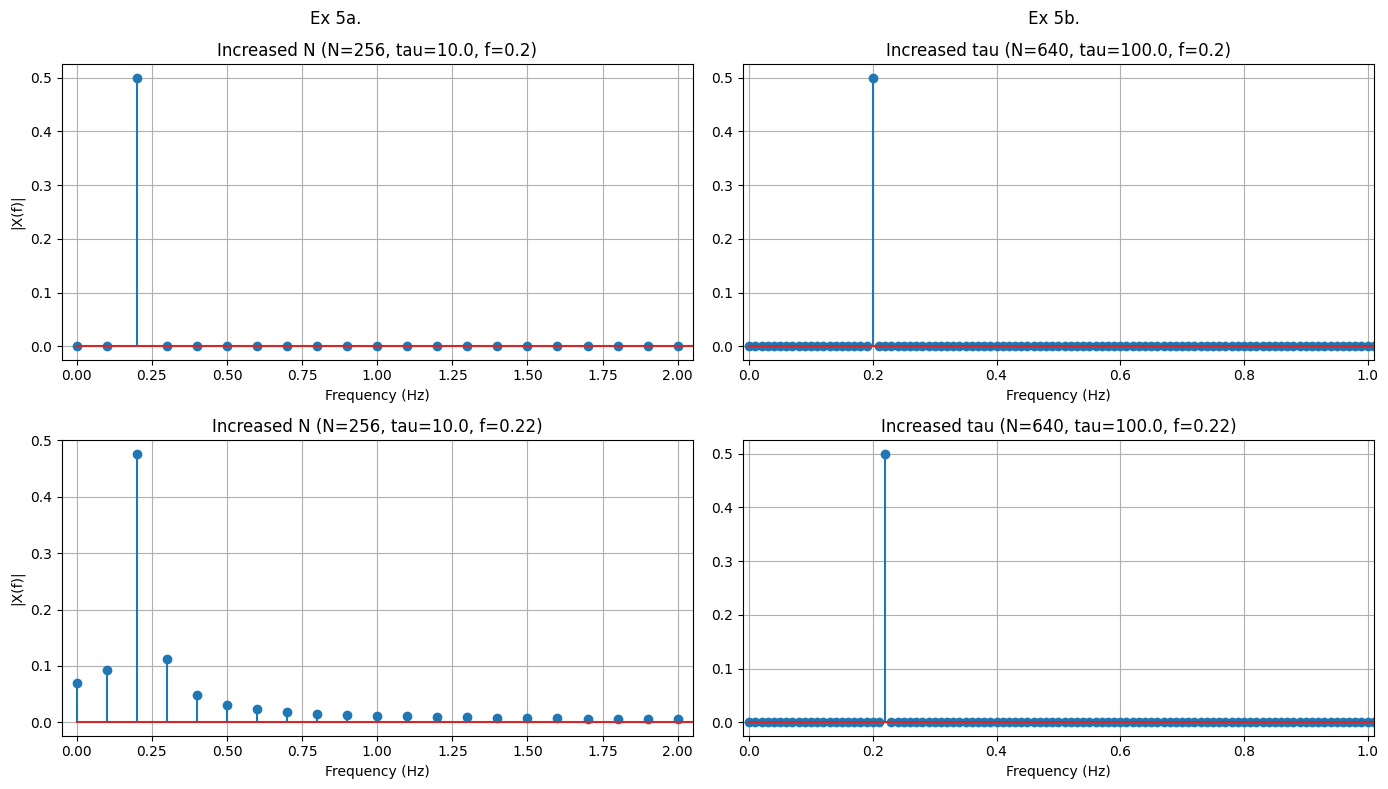


With increased tau, f=0.22Hz fits discretely into an allowed frequency, as the frequencit resolution is improved, so there is no leakage.
While increasing N simply increases the range of frequencies sampled.


In [16]:
# a. Increase N (and thus Sampling Rate), keep tau constant
N_high = 256 # high N for this part
t_high = np.linspace(0, tau, N_high, endpoint=False)
Fs_high = N_high / tau
x_5a1 = np.cos(2*np.pi*f*t_high) # f = 0.20 Hz
x_5a2 = np.cos(2*np.pi*f_new*t_high) # f = 0.22 Hz
frq_5a1, X_5a1 = Spectrum1(x_5a1, Fs_high)
frq_5a2, X_5a2 = Spectrum1(x_5a2, Fs_high)

fig, ax = plt.subplots(2, 2, figsize=(14,8))

# plot the X spectrum for f = 0.20 Hz
ax[0,0].stem(frq_5a1, np.abs(X_5a1))
ax[0,0].set_title(f'Increased N (N={N_high}, tau={tau}, f={f})')
ax[0,0].set_xlabel('Frequency (Hz)')
ax[0,0].set_ylabel('|X(f)|')
ax[0,0].set_xlim(-0.05, 2.05) # set limit so data is more easily visable, after f=2, data is all 0s
ax[0,0].grid()
# plot the X spectrum for f = 0.22 Hz
ax[1,0].stem(frq_5a2, np.abs(X_5a2))
ax[1,0].set_title(f'Increased N (N={N_high}, tau={tau}, f={f_new})')
ax[1,0].set_xlabel('Frequency (Hz)')
ax[1,0].set_ylabel('|X(f)|')
ax[1,0].set_xlim(-0.05, 2.05)
ax[1,0].grid()

# b. Increase tau, keep Fs constant
tau_long = 100.0 # increase duration
N_long = int(tau_long * Fs) # calculate N to keep Fs constant
t_long = np.linspace(0, tau_long, N_long, endpoint=False)
x_5b1 = np.cos(2*np.pi*f*t_long) # f = 0.20 Hz
x_5b2 = np.cos(2*np.pi*f_new*t_long) # f = 0.22 Hz
frq_5b1, X_5b1 = Spectrum1(x_5b1, Fs)
frq_5b2, X_5b2 = Spectrum1(x_5b2, Fs)

# plot the X spectrum for f = 0.20 Hz
ax[0,1].stem(frq_5b1, np.abs(X_5b1))
ax[0,1].set_title(f'Increased tau (N={N_long}, tau={tau_long}, f={f})')
ax[0,1].set_xlabel('Frequency (Hz)')
ax[0,1].set_xlim(-0.01, 1.01)
ax[0,1].grid()
# plot the X spectrum for f = 0.22 Hz
ax[1,1].stem(frq_5b2, np.abs(X_5b2))
ax[1,1].set_title(f'Increased tau (N={N_long}, tau={tau_long}, f={f_new})')
ax[1,1].set_xlabel('Frequency (Hz)')
ax[1,1].set_xlim(-0.01, 1.01)
ax[1,1].grid()

fig.suptitle('Ex 5a.                                                                                                                               Ex 5b.')
fig.tight_layout()
plt.show()

print(
      '\nWith increased tau, f=0.22Hz fits discretely into an allowed frequency, as the frequencit resolution is improved, so there is no leakage.'
      '\nWhile increasing N simply increases the range of frequencies sampled.'
      )

## Exercise 6

[4] Describe what happens to the FFT if you choose non-zero phase in the cosine waves (for both 0.2 and 0.22 Hz). (Hint: Plot both the real and imaginary parts of $X$ in one graph, and $\mid X\mid$ and the argument $\arg(X)$ as a function of frequency on another graph. The function `np.angle()` will be helpful to do this.)

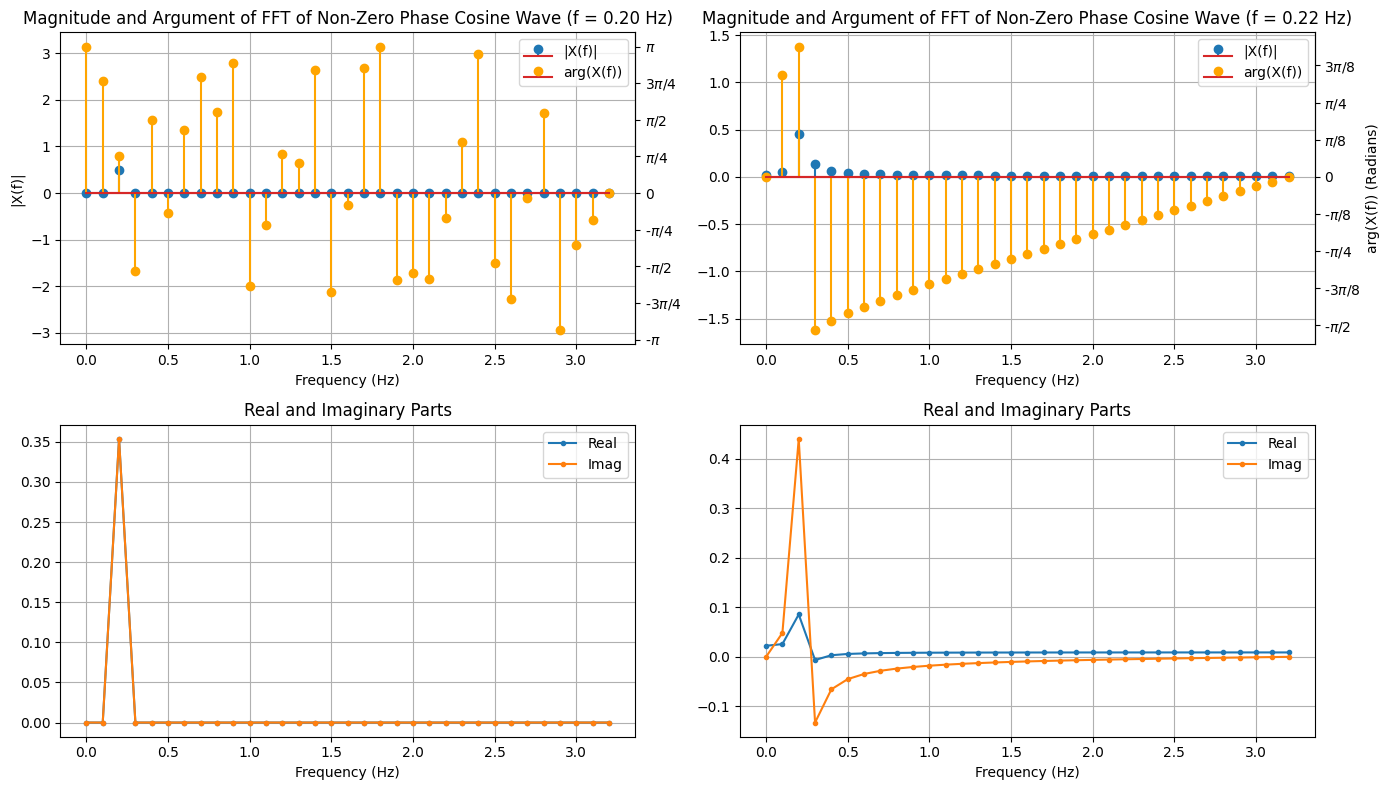


With non-zero phase, the magnitude of X looks identical to the zero-phase case,
while the real and imaginary parts are both now non-zero.
The phase plot shows that at the peak frequency, the argument has value ø, and is otherwise random,
however, with f=0.22Hz, this doesn't work due to the energy leakage.


In [17]:
# N = 64, tau = 10, t and Fs, defined in ex 1.
phase = np.pi / 4  # 45 degrees phase shift
x_phase1 = np.cos(2*np.pi*f*t+phase) # f = 0.20 Hz
x_phase2 = np.cos(2*np.pi*f_new*t+phase) # f = 0.22 Hz
frq_ph1, X_ph1 = Spectrum1(x_phase1, Fs)
frq_ph2, X_ph2 = Spectrum1(x_phase2, Fs)

fig, ax = plt.subplots(2, 2, figsize=(14,8))

# plot magnitudes and arguments in top two plots
# X spectrum for f = 0.20 Hz
ax[0,0].stem(frq_ph1, np.abs(X_ph1), label='|X(f)|')
ax[0,0].stem(frq_ph1, np.angle(X_ph1), 'orange', label='arg(X(f))')
ax[0,0].set_title(f'Magnitude and Argument of FFT of Non-Zero Phase Cosine Wave (f = 0.20 Hz)')
ax[0,0].set_xlabel('Frequency (Hz)')
ax[0,0].set_ylabel('|X(f)|')
ax[0,0].legend()
ax[0,0].grid()
# following code creates a label on the right side of the plot to display radians
ax2 = ax[0,0].secondary_yaxis('right')
ax2.set_yticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]) # goes in pi/4 s
ax2.set_yticklabels([r'-$\pi$', r'-$3\pi/4$', r'-$\pi/2$', r'-$\pi/4$', r'$0$', r'$\pi/4$', r'$\pi/2$', r'3$\pi/4$', r'$\pi$'])
# X spectrum for f = 0.22 Hz
ax[0,1].stem(frq_ph2, np.abs(X_ph2), label='|X(f)|')
ax[0,1].stem(frq_ph2, np.angle(X_ph2), 'orange', label='arg(X(f))')
ax[0,1].set_title(f'Magnitude and Argument of FFT of Non-Zero Phase Cosine Wave (f = 0.22 Hz)')
ax[0,1].set_xlabel('Frequency (Hz)')
ax[0,1].legend()
ax[0,1].grid()
# following code creates a label on the right side of the plot to display radians
ax2 = ax[0,1].secondary_yaxis('right')
ax2.set_ylabel('arg(X(f)) (Radians)')
ax2.set_yticks([-np.pi/2, -3*np.pi/8, -np.pi/4, -np.pi/8, 0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]) # goes in pi/8 s
ax2.set_yticklabels([r'-$\pi/2$', r'-$3\pi/8$', r'-$\pi/4$', r'-$\pi/8$', r'$0$', r'$\pi/8$', r'$\pi/4$', r'3$\pi/8$', r'$\pi/2$'])

# plot the real and imaginary parts in bottom two plots
# f = 0.20 Hz
ax[1,0].plot(frq_ph1, np.real(X_ph1), '.-', label='Real') # real part of X
ax[1,0].plot(frq_ph1, np.imag(X_ph1), '.-', label='Imag') # imaginary part of X
ax[1,0].set_title('Real and Imaginary Parts')
ax[1,0].set_xlabel('Frequency (Hz)')
ax[1,0].legend()
ax[1,0].grid()
# f = 0.22 Hz
ax[1,1].plot(frq_ph2, np.real(X_ph2), '.-', label='Real') # real part of X
ax[1,1].plot(frq_ph2, np.imag(X_ph2), '.-', label='Imag') # imaginary part of X
ax[1,1].set_title('Real and Imaginary Parts')
ax[1,1].set_xlabel('Frequency (Hz)')
ax[1,1].legend()
ax[1,1].grid()

fig.tight_layout()
plt.show()

print(
      '\nWith non-zero phase, the magnitude of X looks identical to the zero-phase case,'
      '\nwhile the real and imaginary parts are both now non-zero.'
      '\nThe phase plot shows that at the peak frequency, the argument has value ø, and is otherwise random,'
      '\nhowever, with f=0.22Hz, this doesn\'t work due to the energy leakage.'
      )

## Exercise 7

[4] Write a function `TestData(N, Fs)` which creates $N$ points of data containing three cosine waves with amplitudes and frequencies $a_1 = 1.0, f_1 = 12.3, a_2 = 0.5, f_2 = 7.5, a_3 = 0.2, f_3 = 30.0$. Use this function to plot the FFT for N=512, 1024 and 2048 and explain the results.

 Recall: The time separation between points is $\Delta t = 1/F_s$. Read the section Summary above!

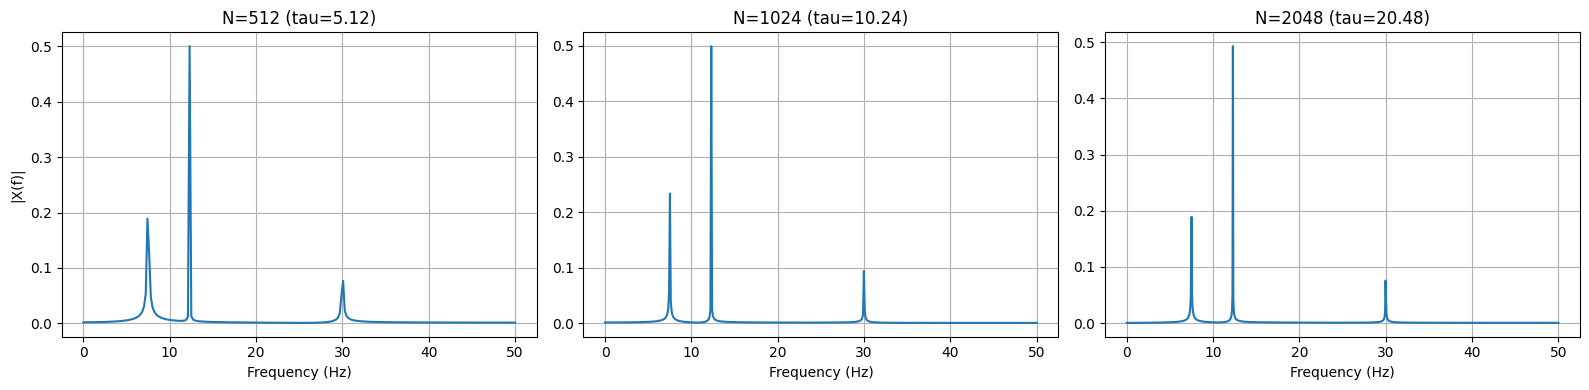


As N is increased, the peaks get sharper and taller,
approaching their true amplitudes (halved).
This is because the frequency resolution (Fs/N) is decreasing.


In [18]:
def TestData(N, Fs):
  # define the tau and t array
  tau = N * 1/Fs
  t = np.linspace(0, tau, N, endpoint=False)
  # a1=1.0, f1=12.3  |  a2=0.5, f2=7.5  |  a3=0.2, f3=30.0
  x = 1.0*np.cos(2*np.pi*12.3*t) + 0.5*np.cos(2*np.pi*7.5*t) + 0.2*np.cos(2*np.pi*30.0*t)
  return x

Fs_fixed = 100.0 # fixed sampling rate
Ns = [512, 1024, 2048] # Different window lengths

fig, ax = plt.subplots(1, 3, figsize=(16, 4))

for i, N_val in enumerate(Ns): # loop through Ns with index and value
    # Generate data and spectrum
    x_comb = TestData(N_val, Fs_fixed)
    frq_comb, X_comb = Spectrum1(x_comb, Fs_fixed)

    # plot
    ax[i].plot(frq_comb, np.abs(X_comb))
    ax[i].set_title(f'N={N_val} (tau={N_val/Fs_fixed})')
    ax[i].set_xlabel('Frequency (Hz)')
    #ax[i].xlim(0, 40) # Limit view to relevant frequencies
    ax[i].grid()

ax[0].set_ylabel('|X(f)|')

fig.tight_layout()
plt.show()

print(
      '\nAs N is increased, the peaks get sharper and taller,'
      '\napproaching their true amplitudes (halved).'
      '\nThis is because the frequency resolution (Fs/N) is decreasing.'
      )